In [4]:
import pandas as pd, matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt

In [5]:
def csv(file):
    df = pd.read_csv(file, sep = ",", skiprows = 2)
    df2 = pd.read_csv("data_table_for_daily_death_trends__arizona.csv", sep = "," , skiprows = 2)
    df["New Deaths"] = df2["New Deaths"]
    df["Doses Per Day"] = 0
    df["Dates"] = df["Date"].replace({"Jan":"01", "Feb":"02","Mar":"03","Apr":"04","May":"05","Jun":"06","Jul":"07","Aug":"08","Sep":"09","Oct":"10","Nov":"11","Dec":"12"}, regex = True)
    df["Total Doses Administered"] = df["Total Doses Administered"].fillna(0)
    for i in range(1, len(df["Total Doses Administered"])-1):
        a = pd.to_numeric(df["Total Doses Administered"])
        df.loc[i-1,"Doses Per Day"] = abs((int(a.iloc[i-1]) - int(a.iloc[i])))
        a.append(df["Doses Per Day"])
    df.drop(labels = [0], axis = 0)
    df.drop([0, 1, 2], axis = 0,inplace = True)
    del df["7-Day Moving Avg"]
    del df["State"]
    return df


In [3]:
def clean_dose():
    df = csv("data_table_for_daily_case_trends__arizona.csv")
    lst_dates = []
    for i in range(349,674):
        df = df.drop(index=i)
    return df
clean_dose()

,Date,New Cases,Total Doses Administered,New Deaths,Doses Per Day,Dates
3,Nov 23 2021,3057,9458251.0,120,90,11 23 2021
4,Nov 22 2021,3249,9458161.0,2,13973,11 22 2021
5,Nov 21 2021,3629,9444188.0,1,12071,11 21 2021
6,Nov 20 2021,5103,9432117.0,53,20805,11 20 2021
7,Nov 19 2021,5070,9411312.0,78,34581,11 19 2021
...,...,...,...,...,...,...
344,Dec 17 2020,5820,7488.0,147,4722,12 17 2020
345,Dec 16 2020,4840,2766.0,108,1522,12 16 2020
346,Dec 15 2020,4137,1244.0,64,366,12 15 2020
347,Dec 14 2020,11809,878.0,1,33,12 14 2020


In [9]:
csv("data_table_for_daily_case_trends__arizona.csv")

,Date,New Cases,Total Doses Administered,New Deaths,Doses Per Day,Dates
3,Nov 23 2021,3057,9458251.0,120,90,11 23 2021
4,Nov 22 2021,3249,9458161.0,2,13973,11 22 2021
5,Nov 21 2021,3629,9444188.0,1,12071,11 21 2021
6,Nov 20 2021,5103,9432117.0,53,20805,11 20 2021
7,Nov 19 2021,5070,9411312.0,78,34581,11 19 2021
...,...,...,...,...,...,...
669,Jan 27 2020,0,0.0,0,0,01 27 2020
670,Jan 26 2020,1,0.0,0,0,01 26 2020
671,Jan 25 2020,0,0.0,0,0,01 25 2020
672,Jan 24 2020,0,0.0,0,0,01 24 2020


In [8]:
def figure1():
    df = csv("data_table_for_daily_case_trends__arizona.csv")
    x = [dt.datetime.strptime(d,'%m %d %Y').date() for d in df["Dates"]]
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m %d %Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
    plt.plot(x,df['New Cases'])
    plt.gcf().autofmt_xdate()
    plt.xlabel("Dates")
    plt.ylabel("New Cases")

In [6]:
def figure2():
    df = csv("data_table_for_daily_case_trends__arizona.csv")
    plt.figure(figsize=(10,10))
    plt.style.use('ggplot')
    lst_dates = []
    for i in df['Dates']:
        lst_dates.append(i)
    x = [dt.datetime.strptime(d,'%m %d %Y').date() for d in df["Dates"]]
    lst = []
    for i in df['New Deaths']:
        lst.append(i)
    x_pos = [i for i, _ in enumerate(x)]
    plt.bar(x,lst,width=0.8, color='black')
    plt.xlabel("Dates")
    plt.ylabel("New Deaths")

In [7]:
def figure3():
    df = clean_dose()
    plt.figure(figsize=(16,10), dpi= 80)
    lst = []
    for i in df["Doses Per Day"]:
        lst.append(i)
    x = np.array(df["Dates"])
    y = np.array(lst)
    plt.scatter(x, y)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
    plt.bar(x,lst,width=0.8, color='navy')
    plt.xlabel("Dates")
    plt.ylabel("Doses Per Day")
    plt.gca().invert_xaxis()

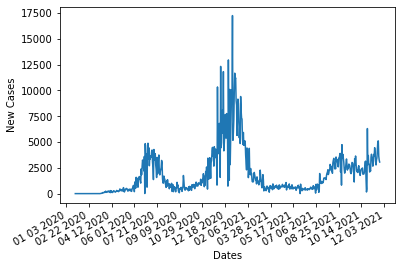

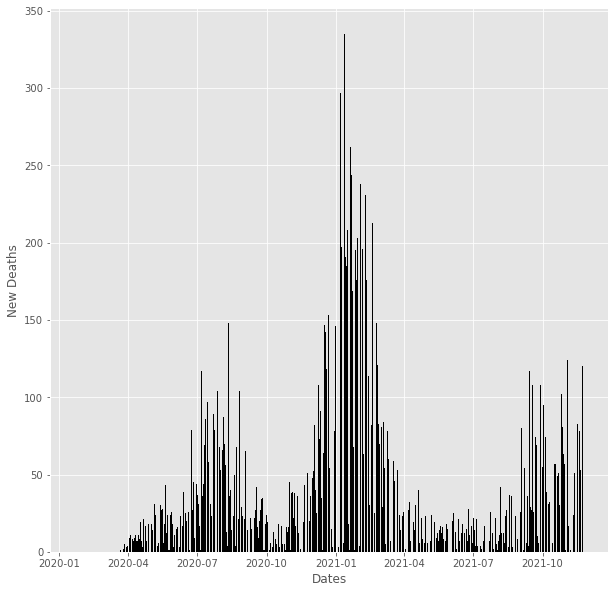

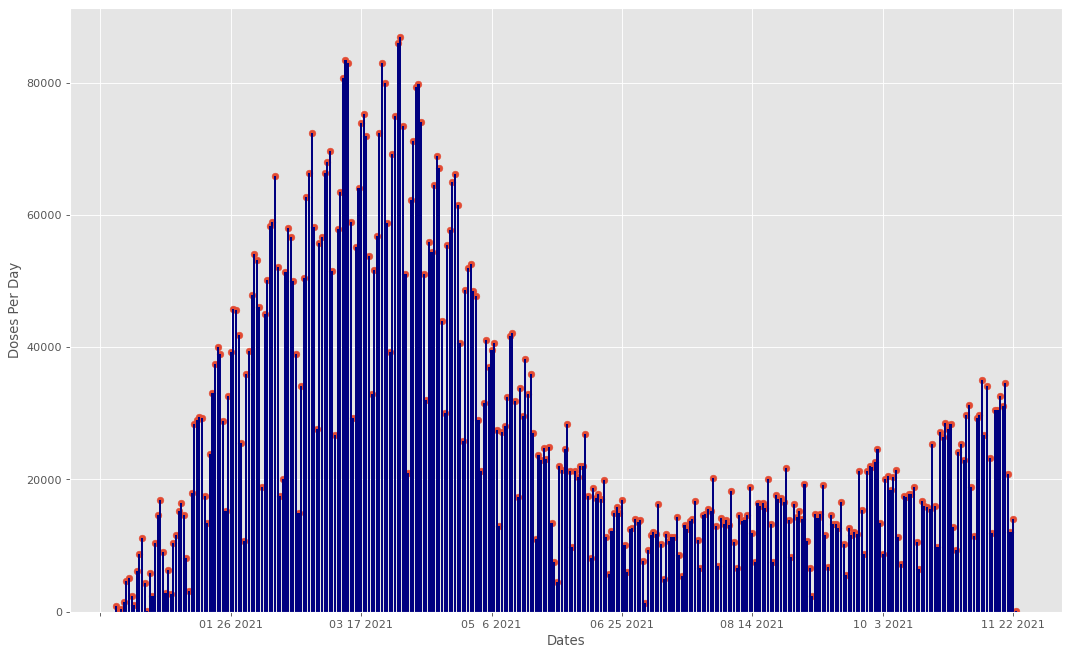

In [10]:
figure1()
figure2()
figure3()
plt.show()